Saving tableConvert.com_zlv5c3.csv to tableConvert.com_zlv5c3 (5).csv
Dataset Shape: (500, 8)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   customer_id             500 non-null    int64
 1   age                     500 non-null    int64
 2   income                  500 non-null    int64
 3   balance                 500 non-null    int64
 4   transactions_per_month  500 non-null    int64
 5   loan                    500 non-null    int64
 6   credit_card             500 non-null    int64
 7   investment_product      500 non-null    int64
dtypes: int64(8)
memory usage: 31.4 KB

Summary Statistics:

========== BUSINESS KPIs ==========
Total Customers: 500
Average Balance: 18141.86
Average Income: 2762.81
Loan Rate: 47.4 %
Investment Adoption Rate: 43.8 %


/tmp/ipython-input-3844376253.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("income_segment")["balance"].mean()


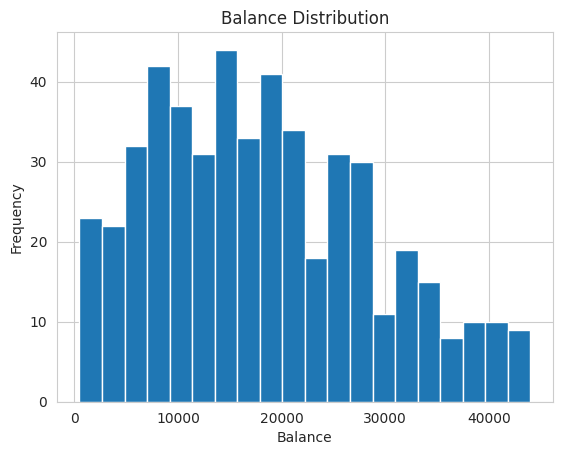

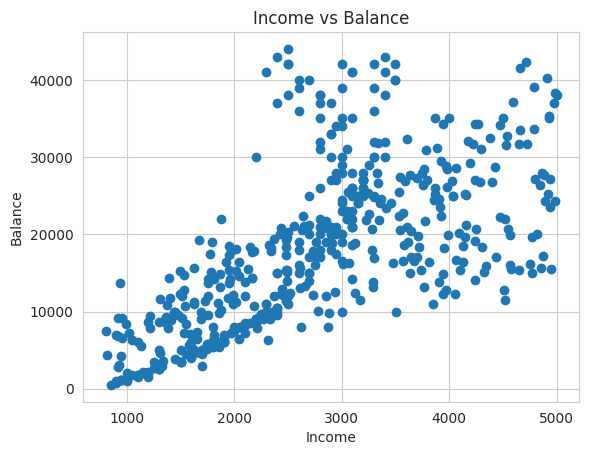

/tmp/ipython-input-3844376253.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  investment_by_segment = df.groupby("income_segment")["investment_product"].mean()


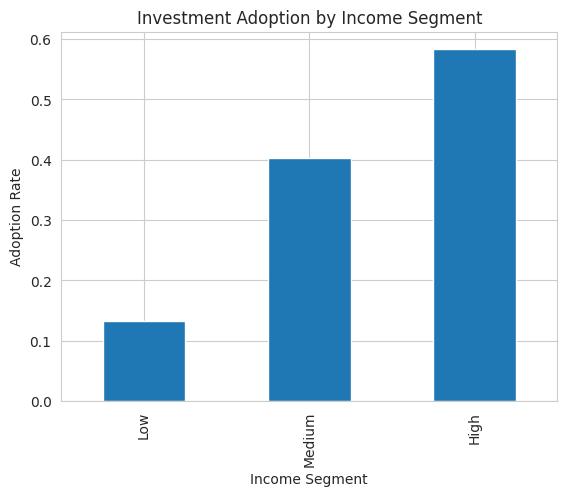

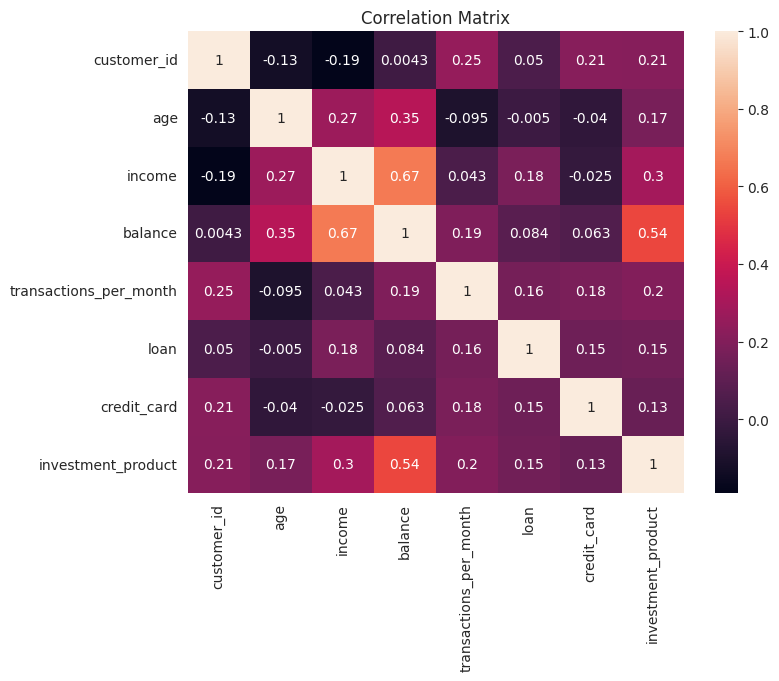

Cross-Sell Opportunity Size: 83


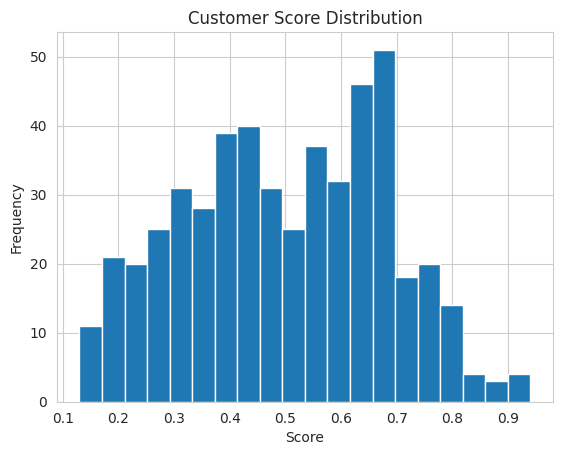

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], sep=",")
df.head()

print("Dataset Shape:", df.shape)
print("\nData Info:\n")
df.info()

print("\nSummary Statistics:\n")
df.describe()


print("========== BUSINESS KPIs ==========")
print("Total Customers:", len(df))
print("Average Balance:", round(df["balance"].mean(),2))
print("Average Income:", round(df["income"].mean(),2))
print("Loan Rate:", round(df["loan"].mean()*100,2), "%")
print("Investment Adoption Rate:", round(df["investment_product"].mean()*100,2), "%")


df["income_segment"] = pd.cut(
    df["income"],
    bins=[0,1500,3000,10000],
    labels=["Low","Medium","High"]
)

df["balance_segment"] = pd.cut(
    df["balance"],
    bins=[0,10000,30000,100000],
    labels=["Low","Medium","High"]
)

df.groupby("income_segment")["balance"].mean()


plt.figure()
plt.hist(df["balance"], bins=20)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.scatter(df["income"], df["balance"])
plt.xlabel("Income")
plt.ylabel("Balance")
plt.title("Income vs Balance")
plt.show()


investment_by_segment = df.groupby("income_segment")["investment_product"].mean()

plt.figure()
investment_by_segment.plot(kind="bar")
plt.title("Investment Adoption by Income Segment")
plt.xlabel("Income Segment")
plt.ylabel("Adoption Rate")
plt.show()

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

df["customer_score"] = (
    df["income"]/df["income"].max() * 0.4 +
    df["balance"]/df["balance"].max() * 0.4 +
    df["transactions_per_month"]/df["transactions_per_month"].max() * 0.2
)

top_customers = df.sort_values("customer_score", ascending=False).head(10)

top_customers[["customer_id","customer_score","income","balance"]]

cross_sell_target = df[
    (df["income_segment"] == "High") &
    (df["investment_product"] == 0)
]

print("Cross-Sell Opportunity Size:", len(cross_sell_target))
cross_sell_target.head()

df["risk_category"] = np.where(
    (df["loan"] == 1) & (df["balance"] < 5000),
    "High Risk",
    np.where(df["loan"] == 1, "Medium Risk", "Low Risk")
)

df["risk_category"].value_counts()


plt.figure()
plt.hist(df["customer_score"], bins=20)
plt.title("Customer Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

